# Analyzing Happiness Index Data

----

#### Summary
In this notebook I will be working on 'happy_index.csv'. Something to note is that I wasn't able to find data from years before 2015, so I used the data from 2016, because I also have data from 2016 in the world_suicide file. I am interested in seeing whether there is a relationship between happiness and suicide rate. 

#### Key Questions
* What countries perform better in the happiness index? Does the pattern look similar to that of the suicide rates ranking? 
* Is there a relationship between indicators of happiness and suicide rates? 

In [80]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

df1 = pd.read_csv('../data/Raw_data/happy_index.csv')
world_total = pd.read_csv('../data/Cleaned_data/suicide_total.csv')



#### Question 1: What countries are happier? 

* The data comes with a rank so I didn't have to do much cleaning
* I also grouped the rows by their regions and took an average of all values for each region to compare them

In [81]:
df1=happy
print(happy.head())

#calculating happiness score by region
happy_by_region=happy.groupby('Region')['Happiness Score'].mean()
happy_by_region=happy_by_region.sort_values(ascending=False)
happy_by_region

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

Region
Australia and New Zealand          7.323500
North America                      7.254000
Western Europe                     6.685667
Latin America and Caribbean        6.101750
Eastern Asia                       5.624167
Middle East and Northern Africa    5.386053
Central and Eastern Europe         5.370690
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Name: Happiness Score, dtype: float64

#### Answer to Question 1
According to this data, the happiest country in the world is Denmark, with a score of 7.526. The least happy country is Burundi, which is a country in Sub-Saharan Africa. Regionally Australia and New Zealand as well as  North American countries tend to have higher happiness scores. The happiest countries tend to be in Europe and America, while the not so happy countries tend to be in Asia and Africa. I also noticed that the happier countries tend to have higher GDPs, although this correlation is not the main interest of my research. 

#### Question 2: Looking for a relationship between happiness and suicide rate
* Then I merged the cleaned world suicide rates data with the happiness index data
* To examine whether there is a relationship between the suicide rates and any one of the variables provided in the happiness index data, I plotted them first and performed regression analysis on the ones that show some correlation

In [83]:
merged = pd.merge(left=happy, right=world_total, left_on='Country', right_on='Country')
merged



,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,rank,Sex,2016,2015,2010,2000,means
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,1,Both sexes,9.2,8.6,9.3,12.7,10.400000
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2,Both sexes,11.3,11.4,11.3,16.8,13.133333
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,3,Both sexes,13.3,12.9,12.3,16.0,13.866667
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,4,Both sexes,10.1,10.2,10.6,12.0,10.900000
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,5,Both sexes,13.8,12.4,16.6,21.6,17.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,152,Both sexes,11.0,11.2,12.5,24.6,16.033333
133,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,153,Both sexes,15.7,15.7,15.5,15.6,15.600000
134,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,154,Both sexes,6.4,6.6,7.4,8.1,7.300000
135,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,155,Both sexes,16.6,16.3,16.9,17.2,16.900000


Text(0.5, 1.0, 'Assocation between happiness and suicide rate')

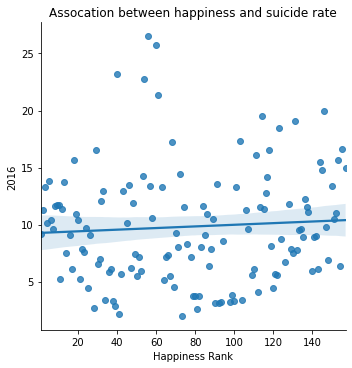

In [30]:
sns.lmplot(x='Happiness Rank', y='2016', data=merged)
plt.title('Assocation between happiness and suicide rate')

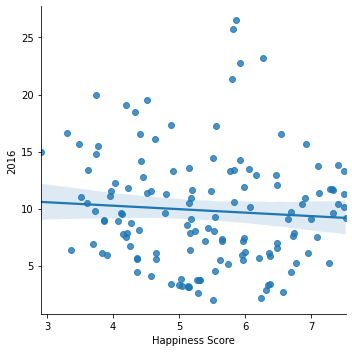

In [31]:
sns.lmplot(x='Happiness Score', y='2016', data=merged)

In [74]:
merged=merged.rename(columns={"Happiness Score": "score"})
m = smf.ols(formula= 'Q("2016") ~ score', data=merged)
res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Q("2016")   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6731
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.413
Time:                        00:44:23   Log-Likelihood:                -413.85
No. Observations:                 137   AIC:                             831.7
Df Residuals:                     135   BIC:                             837.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4665      2.048      5.600      0.0

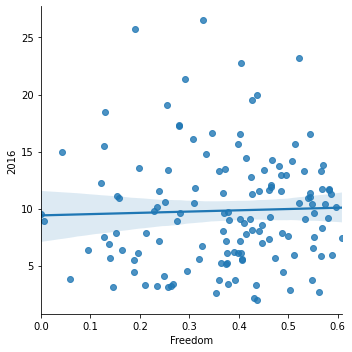

In [32]:
sns.lmplot(x='Freedom', y='2016', data=merged)

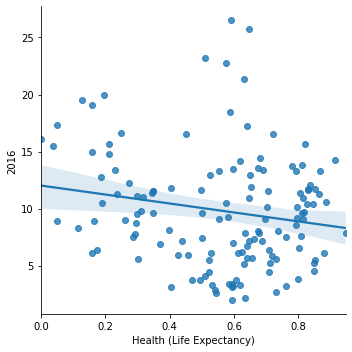

In [33]:
sns.lmplot(x='Health (Life Expectancy)', y='2016', data=merged)

In [66]:
merged=merged.rename(columns={"Health (Life Expectancy)": "health"})
m1 = smf.ols(formula= 'Q("2016") ~ health', data=merged)
res = m1.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Q("2016")   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.560
Date:                Wed, 23 Dec 2020   Prob (F-statistic):             0.0345
Time:                        00:39:18   Log-Likelihood:                -411.92
No. Observations:                 137   AIC:                             827.8
Df Residuals:                     135   BIC:                             833.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0177      1.110     10.822      0.0

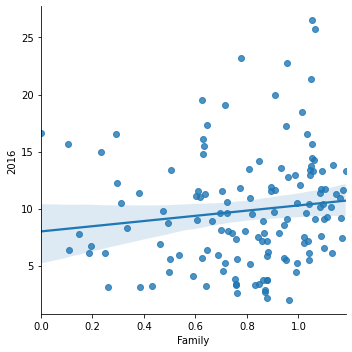

In [72]:
sns.lmplot(x='Family', y='2016', data=merged)

In [68]:
m2 = smf.ols(formula= 'Q("2016") ~ Family', data=merged)
res = m2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Q("2016")   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.113
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.148
Time:                        00:40:42   Log-Likelihood:                -413.13
No. Observations:                 137   AIC:                             830.3
Df Residuals:                     135   BIC:                             836.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9978      1.326      6.033      0.0

#### Answer to Question 2
Happiness score does not seem to be a good predictor for suicide rate. The relationship is minimal and the regression model has a poor fit. The variable with the strongest correlation seem to be life expectancy and suicide rate: the higher the life expectancy, the lower the suicide rate, which is interesting. I was more surprised to see a positive correlation between family (an indicator for social support) and suicide rate, though the correlation doesn't seem very strong. 

In [42]:
#saving the region labels for later use
happy[['Country', 'Region']].to_csv('../data/country_to_region.csv', index=False)